#Evaluation script

##This script is used for evalutaing the models(for classification task). All the auxiliary classes and functions can be found in package `itpma3_utils`<p>

####The command below is to shift the interpreting environment to own personal Google Drive, please change to the correct path before run the command.

In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/ITP_MA3_ProcessMonitoring

/content/drive/MyDrive/Colab Notebooks/ITP_MA3_ProcessMonitoring


###Imports

In [2]:
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy
from keras.optimizers import Adam
import data_processing
from itpma3_utils import *
from itpma3_utils.models import MultiLayerPerceptron
from requirements import version_test

###Data loading and learning rate declaration 

In [3]:
learning_rate = 0.001
x_train, x_val, y_train, y_val = data_processing.load_process()

Hello MA3
['cube ID', 'X', 'Y', 'Z', 'border_label', 'sintering_duration_sum', 'sintering_duration_sum.1', 'senor1_mean', 'senor2_mean', 'senor3_mean', 'sensor1_var', 'sensor2_var', 'sensor3_var', 'sensor1_skew', 'sensor2_skew', 'sensor3_skew', 'mean_scanspeed', 'mean_hacthspacing', 'mean_energydensity', 'var_scanspeed', 'var_hatchspacing', 'var_energydensity']
(4733, 22) (4733,)


###Load the model and chechpoint weights<p>
notice: <br>
1. the model arguments should be exact the same as those at the training time, thus makes sure the weights HDF5 file can be sucessfully loaded. <br>
2. The model should be built before loading weights as the placeholder layer in the model has been canceled.<br>

In [4]:
model = MultiLayerPerceptron(x_train.shape, num_classes=2, drop_rate=0.2, layers=(64, 32))
model.build(input_shape=x_train.shape)
model.load_weights(f'./checkpoint/{model.name}_weights.h5')

###Model compiling<p>
The model should be compiled again as the HDF5 file only saves the weights of the model rather than the entire configurations (loss, optimizer, metric, parameters...)

In [5]:
model.compile(
        loss=BinaryCrossentropy(),
        optimizer=Adam(learning_rate=learning_rate),
        metrics=BinaryAccuracy()
    )

## Predictions on both training and validation data for the future evaluation and visualization.<br>
Unlike multiple class, in binary classifiation, the output predictions are the probabilities of positive class. Thus, the predictions should be converted to labels ($'0'$ and $'1'$). Normally, if the label is balanced, the sigmoid threshold will be 0.5, thus the value greater than 0.5 are considered positive class, negative otherwise.

In [6]:
y_hat_train = model.predict(x_train).ravel()
y_hat = model.predict(x_val).ravel()
# convert probability to predicted class
y_hat_integer = np.floor(np.array(y_hat) + .5)

30/30 [==============================] - 0s 1ms/step


###ROC-AUC curve plotting<p>
The function is already wrapped for visualization which can be found in our utils package.

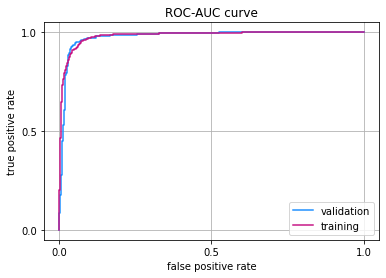

In [7]:
plot_roc_auc_curve(y_val, y_hat, y_train, y_hat_train)

###Metirc scores printing<p>


In [11]:
metric_wrapper = TotalMeanMetricWrapper(model.name, average='binary', direct_cal=True)
metric_wrapper(y_val, y_hat)
metric_wrapper.engaged_metrics

+--------------------------------------------------------------------------------------------------------+
|                                         multi_layer_perceptron                                         |
+--------------------+--------------------+--------------------+--------------------+--------------------+
|      Accuracy      |     Precision      |       Recall       |      F1-score      |        AUC         |
+--------------------+--------------------+--------------------+--------------------+--------------------+
| 0.9440337909186906 | 0.9264069264069265 | 0.9574944071588367 | 0.9416941694169417 | 0.9789038031319911 |
+--------------------+--------------------+--------------------+--------------------+--------------------+


ListWrapper(['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'])

###Confusion matrix plotting

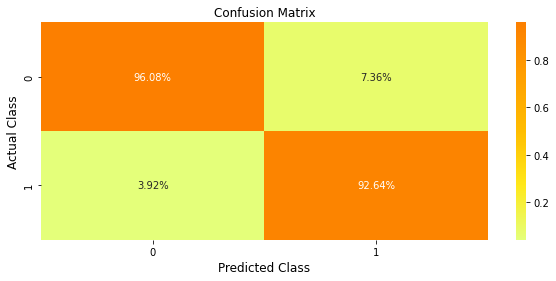

In [12]:
plot_confusion_matrix(y_val, y_hat_integer)